# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Disclaimer:** This notebook was generated automatically by AI (dandi-notebook-gen) and has not been fully verified. Use the code and results with caution.

## Dandiset Overview

*   **Identifier:** DANDI:001174
*   **Name:** Calcium imaging in SMA and M1 of macaques
*   **Description:** _The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate the value of in vivo calcium imaging for studying patterns of activity in groups of corticofugal neurons in SMA and M1._ (From Dandiset metadata)
*   **Key Measured Variables:** `ProcessingModule`, `PlaneSegmentation`, `OpticalChannel`, `ImagingPlane`, `OnePhotonSeries`

## Notebook Goal

This notebook demonstrates how to:
1.  Connect to the DANDI archive and access metadata for Dandiset 001174.
2.  List the assets (files) within the Dandiset.
3.  Load a specific NWB (Neurodata Without Borders) file from the Dandiset directly from the archive using streaming.
4.  Access and visualize processed calcium imaging data, including:
    *   Fluorescence traces for identified Regions of Interest (ROIs).
    *   Spatial footprints (image masks) of these ROIs.
5.  View a frame from the raw imaging data for context.

## Required Packages

This notebook requires the following Python packages. We assume they are already installed.

*   `dandi` (for interacting with the DANDI archive)
*   `pynwb` (for reading NWB files)
*   `h5py` (dependency for pynwb, for HDF5 interaction)
*   `remfile` (for streaming remote HDF5 files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting aesthetics)

## 1. Load Dandiset Information from DANDI Archive

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to DANDI archive
try:
    client = DandiAPIClient()
    dandiset_id = "001174"
    dandiset = client.get_dandiset(dandiset_id)
    assets = list(dandiset.get_assets())

    print(f"Connected to Dandiset {dandiset_id}: {dandiset.get_metadata().name}")
    print(f"Found {len(assets)} assets in the dataset.")

    print("\nFirst 5 assets:")
    for asset in assets[:5]:
        print(f"- {asset.path} (ID: {asset.asset_id})")
except Exception as e:
    print(f"Error connecting to DANDI or getting assets: {e}")

Connected to Dandiset 001174: Calcium imaging in SMA and M1 of macaques
Found 45 assets in the dataset.

First 5 assets:
Error connecting to DANDI or getting assets: 'RemoteBlobAsset' object has no attribute 'asset_id'


## 2. Select and Load a Specific NWB File

We will focus on one specific NWB file from subject 'F' for demonstration. We can stream this file directly from the DANDI archive using its asset URL.

In [3]:
# Select a specific asset (the first one from the listing above)
# You can change this URL to explore other files
nwb_asset_id = "193fee16-550e-4a8f-aab8-2383f6d57a03" # Corresponds to sub-F/sub-F_ses-20240213T110430_ophys.nwb
nwb_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"

print(f"Selected NWB file URL: {nwb_url}")

Selected NWB file URL: https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/


In [4]:
# Load the NWB file using remfile, h5py, and pynwb
# This streams the file content without downloading the whole file
nwb = None
io = None
f = None
try:
    print("Attempting to stream NWB file header...")
    file_stream = remfile.File(nwb_url)
    f = h5py.File(file_stream, 'r')
    io = pynwb.NWBHDF5IO(file=f, mode='r', load_namespaces=True)
    nwb = io.read()
    print("NWB file header loaded successfully.")
    print("\nKey Information:")
    print(f"- Session Description: {nwb.session_description}")
    print(f"- Identifier: {nwb.identifier}")
    print(f"- Session Start Time: {nwb.session_start_time}")
    if nwb.subject:
        print(f"- Subject ID: {nwb.subject.subject_id}")
        print(f"- Subject Sex: {nwb.subject.sex}")
        print(f"- Subject Species: {nwb.subject.species}")
except Exception as e:
    print(f"Error loading NWB file: {e}")
    # Clean up resources if initialization failed partially
    if io:
        io.close()
    if f:
        f.close()

Attempting to stream NWB file header...


NWB file header loaded successfully.

Key Information:
- Session Description: Calcium imaging in SMA during the spontaneous condition
- Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
- Session Start Time: 2024-02-13 11:04:30.267000+00:00
- Subject ID: F
- Subject Sex: F
- Subject Species: Macaca mulatta


## 3. Access Processed Calcium Imaging Data (`ophys`)

Processed data, such as fluorescence traces and ROI masks, are typically stored in the `processing` section of the NWB file, often under a module named 'ophys'.

In [5]:
ophys_module = None
if nwb and 'ophys' in nwb.processing:
    ophys_module = nwb.processing['ophys']
    print("Found 'ophys' processing module.")
    print("Available data interfaces:", list(ophys_module.data_interfaces.keys()))
else:
    print("NWB file not loaded or 'ophys' module not found.")

Found 'ophys' processing module.
Available data interfaces: ['EventAmplitude', 'Fluorescence', 'ImageSegmentation']


## 4. Visualize Fluorescence Traces

Let's plot the fluorescence activity for a few ROIs over a short time period. This data is typically found in a `RoiResponseSeries` within the `Fluorescence` data interface.

Accessing fluorescence data...
Loading data for ROIs [np.int64(0), np.int64(1), np.int64(2)] (Indices [0, 1, 2]) for the first 1000 time points.
Plotting fluorescence traces...


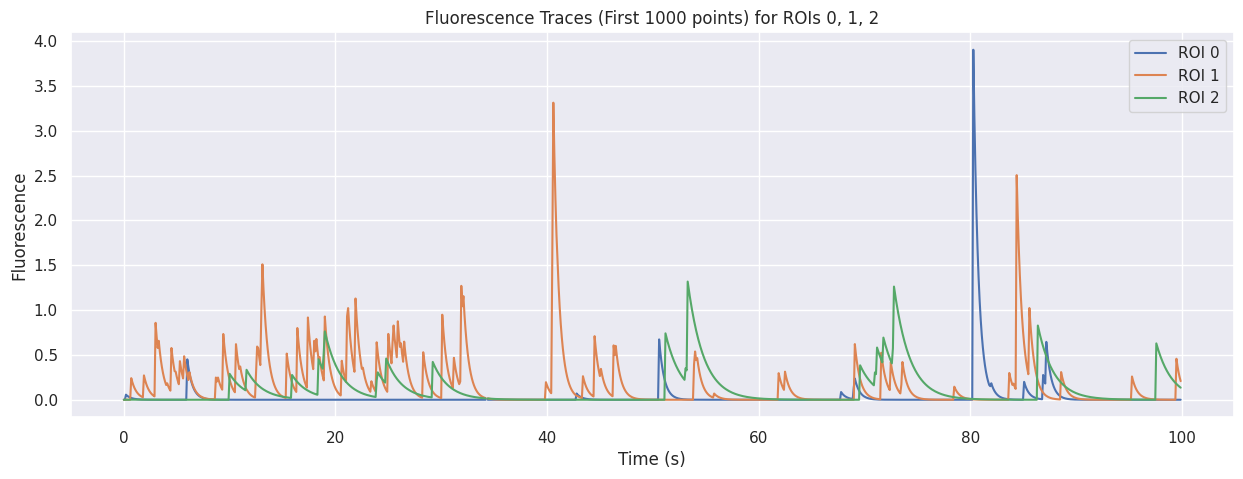

In [6]:
if ophys_module and "Fluorescence" in ophys_module.data_interfaces:
    fluorescence_interface = ophys_module.data_interfaces["Fluorescence"]
    if "RoiResponseSeries" in fluorescence_interface.roi_response_series:
        roi_response_series = fluorescence_interface.roi_response_series["RoiResponseSeries"]
        
        print("Accessing fluorescence data...")
        fluorescence_data = roi_response_series.data
        rate = roi_response_series.rate
        starting_time = roi_response_series.starting_time
        roi_table = roi_response_series.rois.table # Provides ROI IDs

        # Select ROIs and time points
        num_time_points_to_plot = 1000 # Approx 100 seconds given rate ~10Hz
        num_rois_to_plot = min(3, fluorescence_data.shape[1]) # Plot up to 3 ROIs
        roi_indices = list(range(num_rois_to_plot))
        roi_ids = roi_table.id[roi_indices]

        print(f"Loading data for ROIs {list(roi_ids)} (Indices {roi_indices}) for the first {num_time_points_to_plot} time points.")
        # Load data subset
        selected_fluorescence = fluorescence_data[:num_time_points_to_plot, roi_indices]

        # Calculate corresponding timestamps
        selected_timestamps = starting_time + np.arange(num_time_points_to_plot) / rate

        print("Plotting fluorescence traces...")
        # Plot the data
        sns.set_theme()
        plt.figure(figsize=(15, 5))
        for i, roi_id in enumerate(roi_ids):
             plt.plot(selected_timestamps, selected_fluorescence[:, i], label=f"ROI {roi_id}")

        plt.title(f"Fluorescence Traces (First {num_time_points_to_plot} points) for ROIs {', '.join(map(str, roi_ids))}")
        plt.xlabel("Time (s)")
        plt.ylabel("Fluorescence")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Could not find 'RoiResponseSeries' in Fluorescence interface.")
else:
    print("'ophys' module or 'Fluorescence' interface not available.")

## 5. Visualize ROI Masks (Spatial Footprints)

The spatial shapes and locations of the ROIs are stored in the `ImageSegmentation` interface, typically within a `PlaneSegmentation` table. Let's visualize where the detected ROIs are located in the field of view using a maximum projection of their masks.

Accessing image masks...


Loaded 6 masks with shape 318x198.
Plotting max projection of ROI masks...


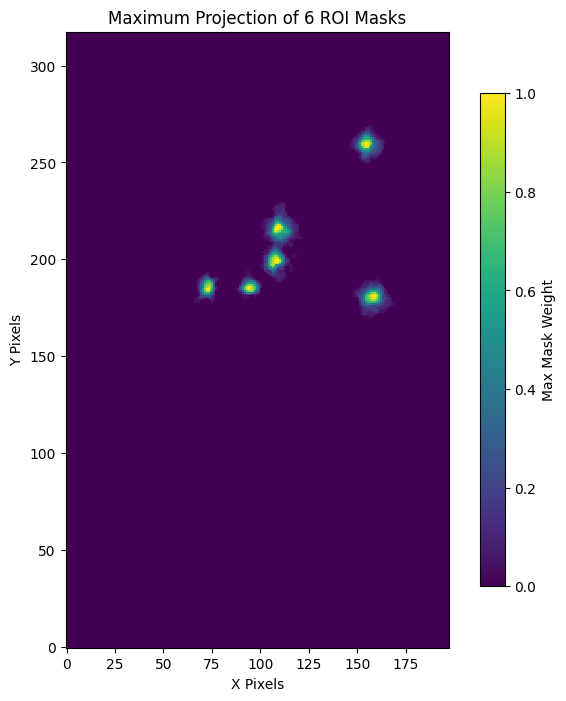

In [7]:
if ophys_module and "ImageSegmentation" in ophys_module.data_interfaces:
    img_seg_interface = ophys_module.data_interfaces["ImageSegmentation"]
    if "PlaneSegmentation" in img_seg_interface.plane_segmentations:
        plane_segmentation = img_seg_interface.plane_segmentations["PlaneSegmentation"]

        print("Accessing image masks...")
        # Load all image masks. Shape: (num_rois, height, width)
        try:
            image_masks_data = plane_segmentation["image_mask"][:]
            num_rois, height, width = image_masks_data.shape
            print(f"Loaded {num_rois} masks with shape {height}x{width}.")

            # Create a max projection
            max_projection = np.max(image_masks_data, axis=0)

            print("Plotting max projection of ROI masks...")
            # Plot the max projection
            # No seaborn style for images
            plt.style.use('default') # Ensure seaborn theme doesn't interfere
            plt.figure(figsize=(8, 8))
            img = plt.imshow(max_projection, cmap='viridis', interpolation='nearest', origin='lower')
            plt.title(f"Maximum Projection of {num_rois} ROI Masks")
            plt.xlabel("X Pixels")
            plt.ylabel("Y Pixels")
            plt.colorbar(img, label='Max Mask Weight', shrink=0.8) # Adjust colorbar size
            plt.show()

        except Exception as e:
             print(f"Error loading or plotting image masks: {e}")
    else:
        print("Could not find 'PlaneSegmentation' in ImageSegmentation interface.")
else:
    print("'ophys' module or 'ImageSegmentation' interface not available.")

## 6. Visualize Raw Imaging Data Frame

To provide context for the ROI segmentation, let's look at a single frame from the raw one-photon calcium imaging video (`OnePhotonSeries`). This is usually found in the `acquisition` part of the NWB file. Note the non-uniform illumination common in raw miniscope data.

Raw data dimensions: 6026 frames, 1280x800 pixels
Loading frame 0...


Frame loaded.
Plotting raw frame...


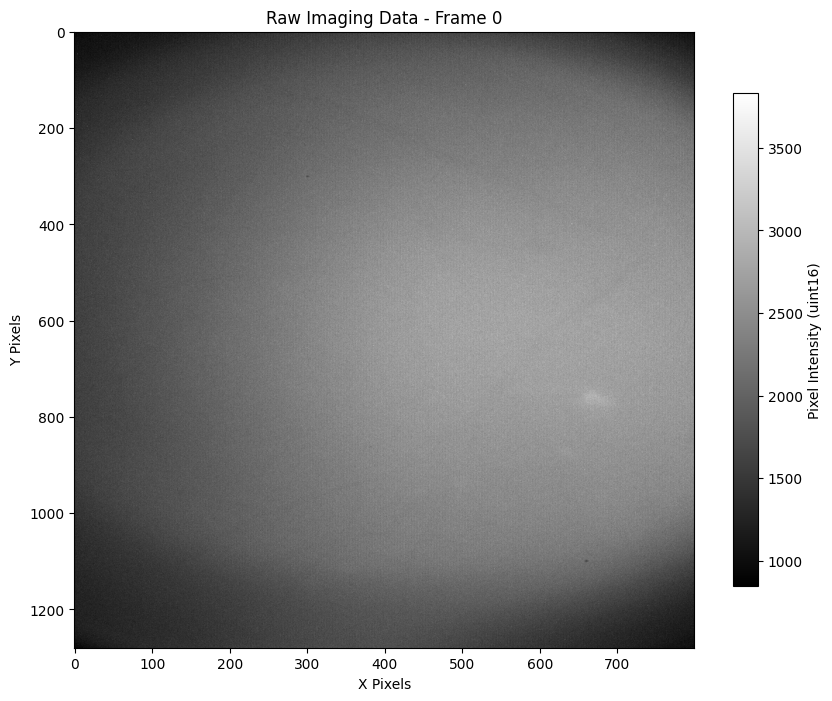

In [8]:
if nwb and "OnePhotonSeries" in nwb.acquisition:
     one_photon_series = nwb.acquisition["OnePhotonSeries"]
     raw_data = one_photon_series.data
     num_frames, height, width = raw_data.shape
     print(f"Raw data dimensions: {num_frames} frames, {height}x{width} pixels")

     # Select and load the first frame
     frame_index = 0
     print(f"Loading frame {frame_index}...")
     try:
        frame_data = raw_data[frame_index, :, :]
        print("Frame loaded.")

        print("Plotting raw frame...")
        # Plot the frame
        plt.style.use('default') # Ensure seaborn theme doesn't interfere
        plt.figure(figsize=(10, 8))
        plt.imshow(frame_data, cmap='gray', aspect='auto')
        plt.title(f"Raw Imaging Data - Frame {frame_index}")
        plt.xlabel("X Pixels")
        plt.ylabel("Y Pixels")
        plt.colorbar(label='Pixel Intensity (uint16)', shrink=0.8) # Adjust colorbar size
        plt.show()
     except Exception as e:
         print(f"Error loading or plotting raw frame data: {e}")
else:
    print("NWB file not loaded or 'OnePhotonSeries' not found in acquisition.")

## 7. Summary and Future Directions

This notebook demonstrated how to access Dandiset 001174, load a specific NWB file via streaming, and visualize basic processed optical physiology data (fluorescence traces and ROI masks) as well as raw imaging data.

**Possible Future Directions:**
*   Explore other data interfaces available in the `ophys` module, such as `EventAmplitude` if present, which might contain detected neural events.
*   Analyze data from other NWB files within the Dandiset corresponding to different subjects or experimental sessions.
*   Load and analyze behavioral data if available in the NWB file (not explored here) and correlate it with neural activity.
*   Perform more advanced analyses on the fluorescence traces, such as calculating ΔF/F, event detection, or correlation analysis between ROIs.
*   Investigate the raw `OnePhotonSeries` data further, potentially applying motion correction or background subtraction techniques.

In [9]:
# Clean up: Close the NWB file connection
try:
    if io:
        print("Closing NWB file.")
        io.close()
    if f:
        # H5py file object might be closed by io.close(), but double check
        try:
            f.close()
        except Exception as e_f:
            pass # Ignore if already closed
except Exception as e:
    print(f"An error occurred during cleanup: {e}")

print("Notebook execution finished.")

Closing NWB file.
Notebook execution finished.
